In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sys
import os

sys.path.insert(0, os.path.join('..', 'src'))
from loader import load_all

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
DATA_DIR = os.path.join('..', 'data', 'raw')
df = load_all(DATA_DIR)
print(f"Dataset: {df.shape[0]} months × {df.shape[1]} columns")
print(f"Date range: {df['date'].min().strftime('%b %Y')} to {df['date'].max().strftime('%b %Y')}")
df.head(10)

Dataset: 74 months × 8 columns
Date range: Jan 2020 to Feb 2026


,date,inflation_all_items,inflation_food,inflation_core,usd_ngn,fuel_price_ngn,price_source,post_subsidy_removal
0,2020-01-01,12.13,14.85,9.81,306.96,145.00,fixed_govt,0
1,2020-02-01,12.20,14.90,9.95,306.96,145.00,fixed_govt,0
2,2020-03-01,12.26,14.98,10.22,326.63,145.00,fixed_govt,0
3,2020-04-01,12.34,15.03,10.57,361.00,145.00,fixed_govt,0
4,2020-05-01,12.40,15.04,10.70,361.00,145.00,fixed_govt,0
5,2020-06-01,12.56,15.18,10.57,361.00,145.00,fixed_govt,0
6,2020-07-01,12.82,15.48,10.64,377.19,145.00,fixed_govt,0
7,2020-08-01,13.22,16.00,11.07,381.00,145.00,fixed_govt,0
8,2020-09-01,13.71,16.66,11.16,381.00,145.00,fixed_govt,0
9,2020-10-01,14.23,17.38,11.71,381.00,145.00,fixed_govt,0


In [3]:
print("=== Missing Values ===")
print(df.isnull().sum())
print()
print("=== Data Types ===")
print(df.dtypes)
print()
print("=== Summary Statistics ===")
df.describe()

=== Missing Values ===
date                    0
inflation_all_items     1
inflation_food          1
inflation_core          1
usd_ngn                 0
fuel_price_ngn          8
price_source            8
post_subsidy_removal    0
dtype: int64

=== Data Types ===
date                    datetime64[us]
inflation_all_items            float64
inflation_food                 float64
inflation_core                 float64
usd_ngn                        float64
fuel_price_ngn                 float64
price_source                       str
post_subsidy_removal             int64
dtype: object

=== Summary Statistics ===


,date,inflation_all_items,inflation_food,inflation_core,usd_ngn,fuel_price_ngn,post_subsidy_removal
count,74,73.00,73.00,73.00,74.00,66.00,74.00
mean,2023-01-15 17:50:16.216216,21.58,24.23,18.63,820.36,412.73,0.46
min,2020-01-01 00:00:00,12.13,8.89,9.81,306.96,145.00,0.00
25%,2021-07-08 18:00:00,15.92,17.38,13.78,401.15,162.00,0.00
50%,2023-01-16 12:00:00,20.77,23.12,18.21,645.19,179.00,0.00
75%,2024-07-24 06:00:00,26.72,26.98,23.59,1478.97,688.61,1.00
max,2026-02-01 00:00:00,34.80,40.87,29.28,1595.05,1214.77,1.00
std,NaN,6.85,8.23,5.86,507.51,367.85,0.50


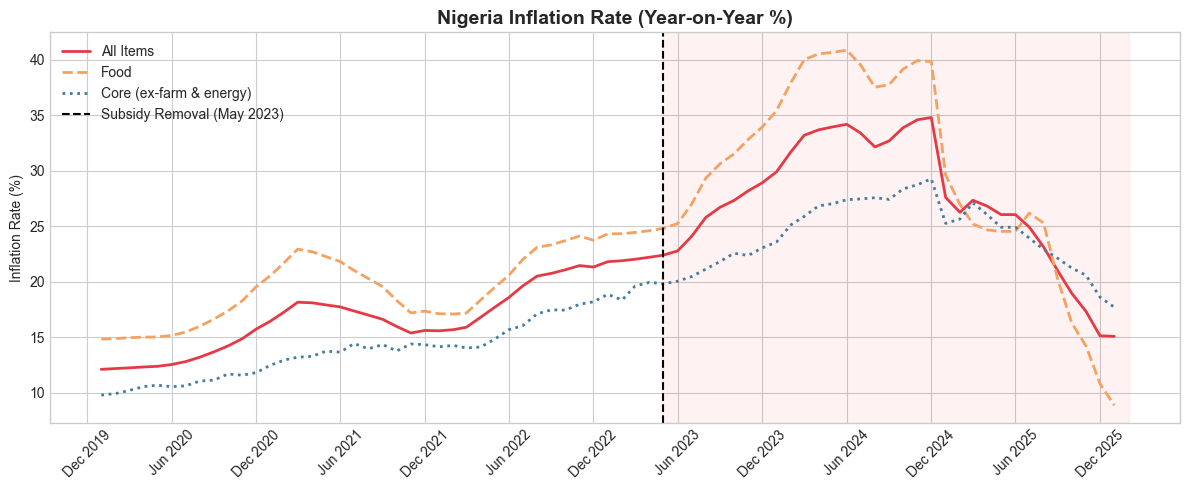

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df['date'], df['inflation_all_items'], label='All Items', linewidth=2, color='#e63946')
ax.plot(df['date'], df['inflation_food'], label='Food', linewidth=2, color='#f4a261', linestyle='--')
ax.plot(df['date'], df['inflation_core'], label='Core (ex-farm & energy)', linewidth=2, color='#457b9d', linestyle=':')

# Mark subsidy removal
ax.axvline(pd.Timestamp('2023-05-01'), color='black', linestyle='--', linewidth=1.5, label='Subsidy Removal (May 2023)')
ax.axvspan(pd.Timestamp('2023-05-01'), df['date'].max(), alpha=0.05, color='red')

ax.set_title('Nigeria Inflation Rate (Year-on-Year %)', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Inflation Rate (%)')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/inflation_trends.png', dpi=150)
plt.show()

## 2. Fuel Pump Prices
The most direct effect of the subsidy removal — petrol prices more than tripled overnight.

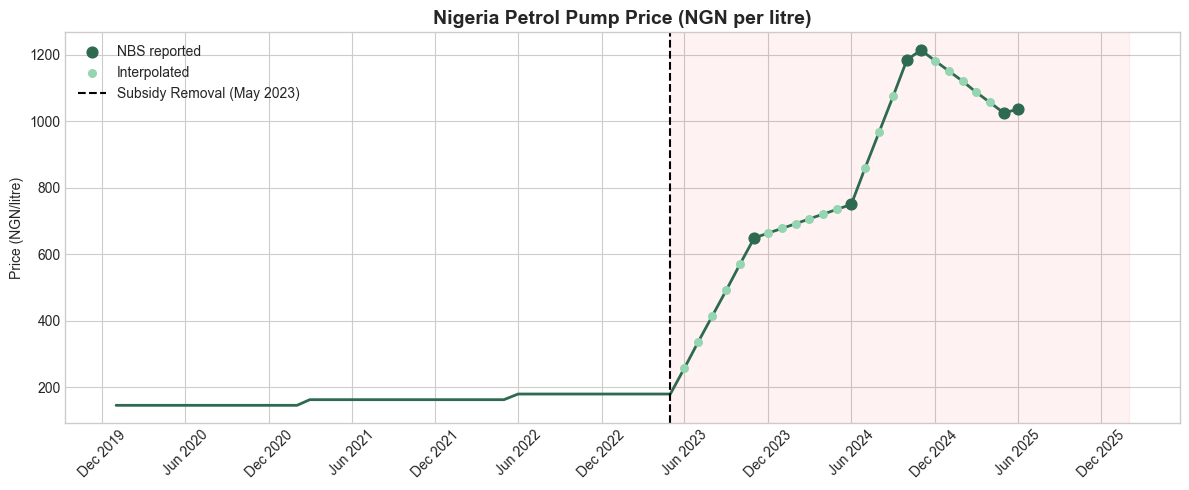

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))

# Separate by source for styling
fixed = df[df['price_source'] == 'fixed_govt']
reported = df[df['price_source'] == 'nbs_pms_report']
interpolated = df[df['price_source'] == 'interpolated']

ax.plot(df['date'], df['fuel_price_ngn'], color='#2d6a4f', linewidth=2)
ax.scatter(reported['date'], reported['fuel_price_ngn'], color='#2d6a4f', zorder=5, s=60, label='NBS reported')
ax.scatter(interpolated[interpolated['date'] > '2023-05-01']['date'],
           interpolated[interpolated['date'] > '2023-05-01']['fuel_price_ngn'],
           color='#95d5b2', zorder=4, s=30, label='Interpolated')

ax.axvline(pd.Timestamp('2023-05-01'), color='black', linestyle='--', linewidth=1.5, label='Subsidy Removal (May 2023)')
ax.axvspan(pd.Timestamp('2023-05-01'), df['date'].max(), alpha=0.05, color='red')

ax.set_title('Nigeria Petrol Pump Price (NGN per litre)', fontsize=14, fontweight='bold')
ax.set_ylabel('Price (NGN/litre)')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/fuel_prices.png', dpi=150)
plt.show()

**Cell 8 — Markdown**

## 3. Exchange Rate (USD/NGN)
The naira had already been under pressure before the subsidy removal, but the removal accelerated the devaluation.

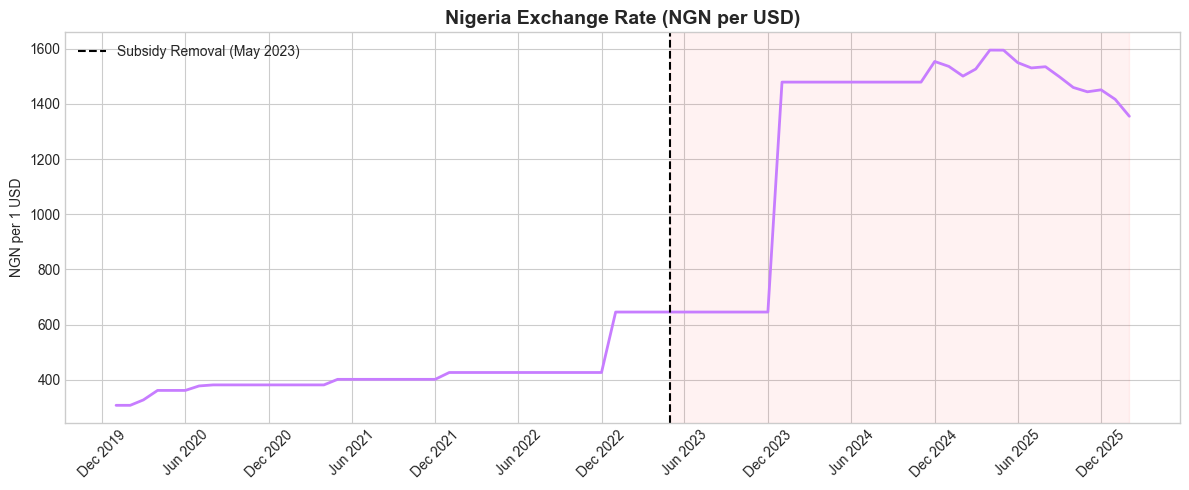

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df['date'], df['usd_ngn'], color='#c77dff', linewidth=2)
ax.axvline(pd.Timestamp('2023-05-01'), color='black', linestyle='--', linewidth=1.5, label='Subsidy Removal (May 2023)')
ax.axvspan(pd.Timestamp('2023-05-01'), df['date'].max(), alpha=0.05, color='red')

ax.set_title('Nigeria Exchange Rate (NGN per USD)', fontsize=14, fontweight='bold')
ax.set_ylabel('NGN per 1 USD')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/exchange_rate.png', dpi=150)
plt.show()

## 4. All Indicators Together
How do the three indicators move in relation to each other around the subsidy removal?

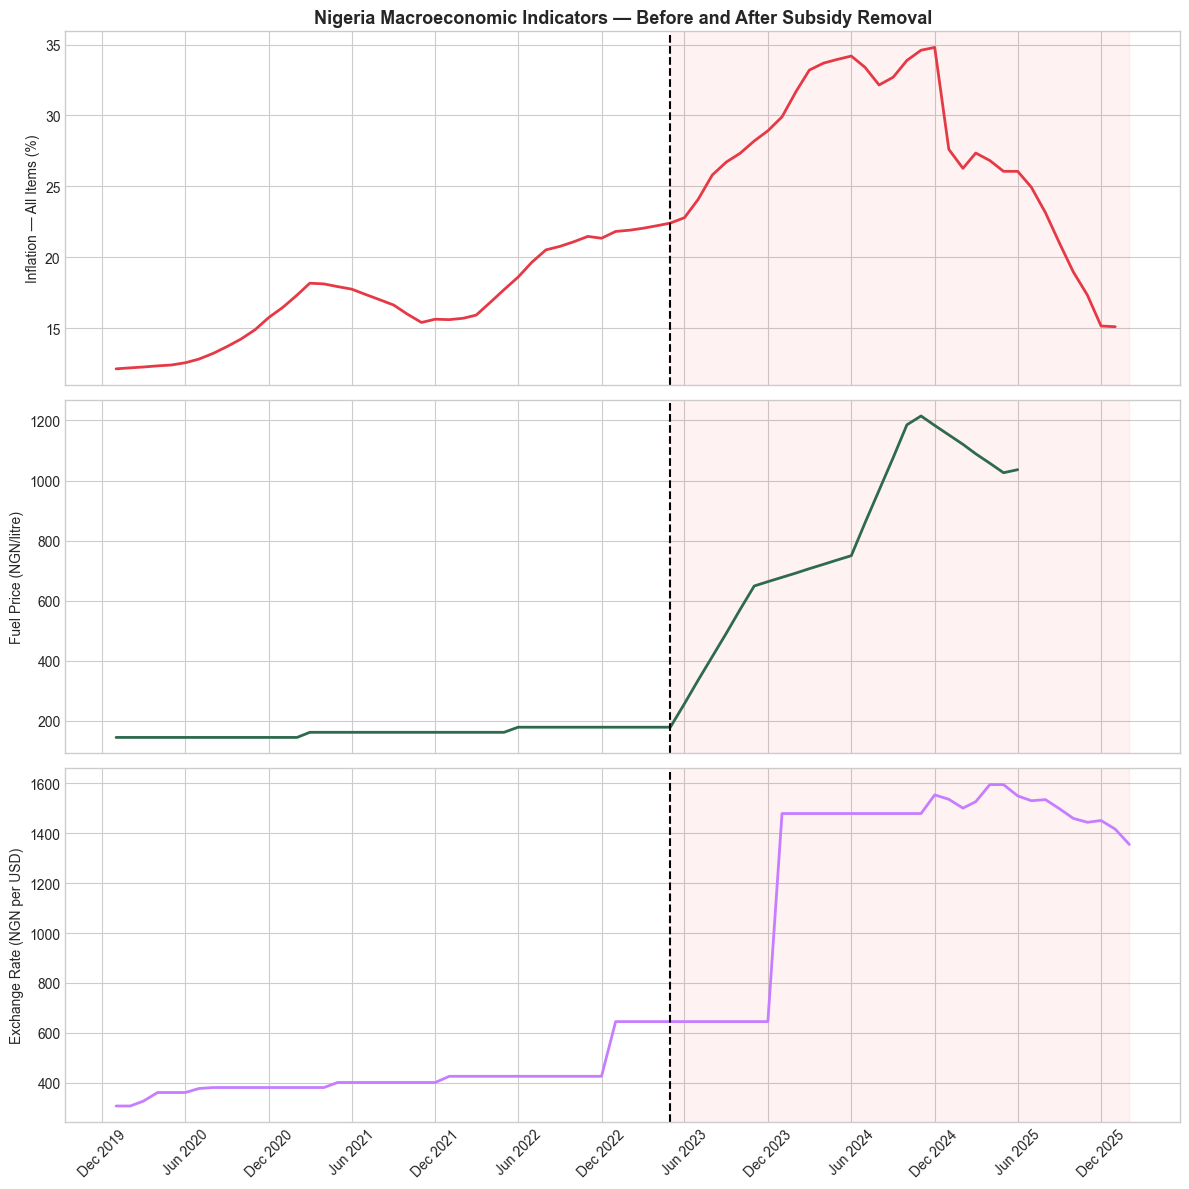

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

indicators = [
    ('inflation_all_items', 'Inflation — All Items (%)', '#e63946'),
    ('fuel_price_ngn', 'Fuel Price (NGN/litre)', '#2d6a4f'),
    ('usd_ngn', 'Exchange Rate (NGN per USD)', '#c77dff'),
]

for ax, (col, title, color) in zip(axes, indicators):
    ax.plot(df['date'], df[col], color=color, linewidth=2)
    ax.axvline(pd.Timestamp('2023-05-01'), color='black', linestyle='--', linewidth=1.5)
    ax.axvspan(pd.Timestamp('2023-05-01'), df['date'].max(), alpha=0.05, color='red')
    ax.set_ylabel(title, fontsize=10)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

axes[0].set_title('Nigeria Macroeconomic Indicators — Before and After Subsidy Removal', 
                   fontsize=13, fontweight='bold')
axes[-1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../outputs/combined_indicators.png', dpi=150)
plt.show()

## 5. Pre vs Post Subsidy Removal — Summary Statistics
A simple before/after comparison of average values across both periods.

In [9]:
pre = df[df['post_subsidy_removal'] == 0][['inflation_all_items', 'inflation_food', 'fuel_price_ngn', 'usd_ngn']].mean()
post = df[df['post_subsidy_removal'] == 1][['inflation_all_items', 'inflation_food', 'fuel_price_ngn', 'usd_ngn']].mean()

comparison = pd.DataFrame({'Pre-Removal (avg)': pre, 'Post-Removal (avg)': post})
comparison['Change (%)'] = ((comparison['Post-Removal (avg)'] - comparison['Pre-Removal (avg)']) / comparison['Pre-Removal (avg)'] * 100).round(1)
comparison = comparison.round(2)
comparison

,Pre-Removal (avg),Post-Removal (avg),Change (%)
inflation_all_items,16.89,27.28,61.50
inflation_food,19.68,29.76,51.20
fuel_price_ngn,160.72,800.43,398.00
usd_ngn,418.29,1293.39,209.20


## 6. Correlation Analysis
Do fuel prices and exchange rates correlate with inflation? And does the relationship change post-removal?

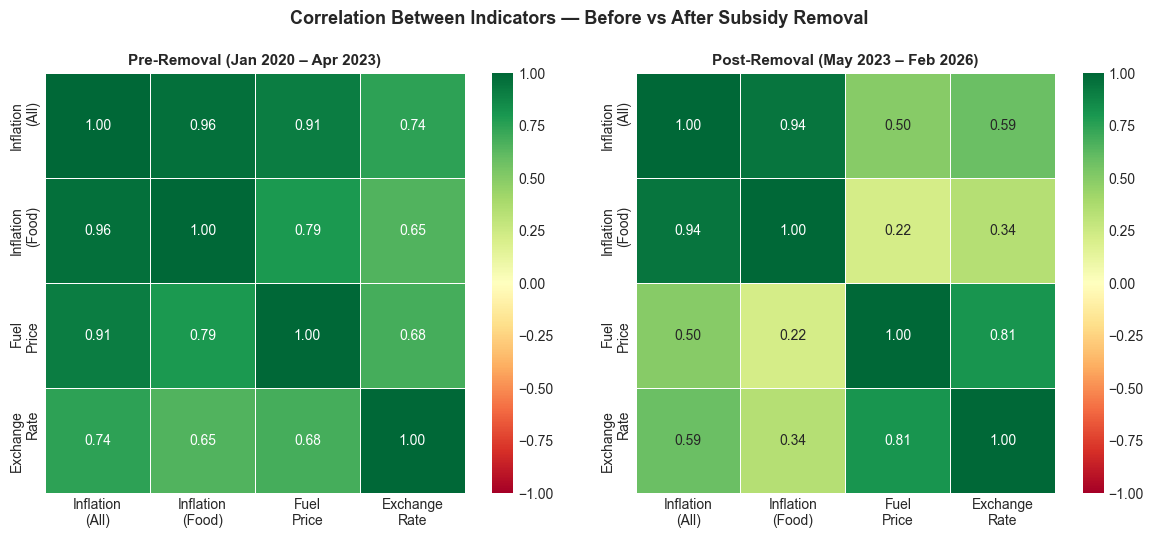

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cols = ['inflation_all_items', 'inflation_food', 'fuel_price_ngn', 'usd_ngn']
labels = ['Inflation\n(All)', 'Inflation\n(Food)', 'Fuel\nPrice', 'Exchange\nRate']

for ax, period, title in zip(axes, [0, 1], ['Pre-Removal (Jan 2020 – Apr 2023)', 'Post-Removal (May 2023 – Feb 2026)']):
    subset = df[df['post_subsidy_removal'] == period][cols].dropna()
    corr = subset.corr()
    sns.heatmap(corr, ax=ax, annot=True, fmt='.2f', cmap='RdYlGn',
                xticklabels=labels, yticklabels=labels,
                vmin=-1, vmax=1, square=True, linewidths=0.5)
    ax.set_title(title, fontsize=11, fontweight='bold')

plt.suptitle('Correlation Between Indicators — Before vs After Subsidy Removal', 
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/correlation_heatmap.png', dpi=150)
plt.show()

## 7. Key Findings from EDA

- All three indicators — inflation, fuel prices, and exchange rate — show a clear structural shift after May 2023
- Fuel prices increased by ~398% on average post-removal, the most dramatic change
- Headline inflation rose from an average of 16.9% to 27.3% (+61.5%)
- Food inflation was particularly severe, peaking above 40% in mid-2024
- The naira depreciated sharply, with the exchange rate rising from ~418 to ~1,293 NGN/USD
- Correlations between all indicators strengthen significantly in the post-removal period, suggesting they moved together more tightly after the shock
- Inflation has been declining since late 2024, but remains well above pre-removal levels

**Caveat:** The exchange rate series uses World Bank annual averages expanded to monthly for 2021–2023, which explains the stepped appearance. This will be noted in the final analysis.